In [2]:
'S2A_MSIL2A_20200105T053221_N9999_R105_T43RGQ_20211115T110155.SAFE'.split('_')[1][3:]

'L2A'

In [3]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)


MinMaxScaler()

In [4]:
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [5]:
scaler = MinMaxScaler().fit(data)
scaler.transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [7]:
import numpy as np

In [45]:
arr = np.array([[5, np.nan, np.nan, 7, 2],
                [3, np.nan, 1, 8, np.nan],
                [4, 9, 6, np.nan, np.nan]])
mask = np.isnan(arr)
idx = np.where(~mask,np.arange(mask.shape[1]),0)
print(idx)
np.maximum.accumulate(idx,axis=1, out=idx)
print(idx)
out = arr[np.arange(idx.shape[0])[:,None], idx]

[[0 0 0 3 4]
 [0 0 2 3 0]
 [0 1 2 0 0]]
[[0 0 0 3 4]
 [0 0 2 3 3]
 [0 1 2 2 2]]


In [ ]:
arr[mask] = arr[np.nonzero(mask)[0], idx[mask]]

In [33]:
np.nonzero(mask)[0]

array([0, 0, 1, 1, 2, 2], dtype=int64)

In [34]:
idx[mask]

array([0, 0, 0, 3, 2, 2])

In [9]:
arr

array([[ 5., nan, nan,  7.,  2.],
       [ 3., nan,  1.,  8., nan],
       [ 4.,  9.,  6., nan, nan]])

In [10]:
out

array([[5., 5., 5., 7., 2.],
       [3., 3., 1., 8., 8.],
       [4., 9., 6., 6., 6.]])

In [11]:
mask

array([[False,  True,  True, False, False],
       [False,  True, False, False,  True],
       [False, False, False,  True,  True]])

In [12]:
idx

array([[0, 0, 0, 3, 4],
       [0, 0, 2, 3, 3],
       [0, 1, 2, 2, 2]])

In [13]:
from scipy import interpolate

In [38]:
x = np.arange(0, 12)
y = np.array([1,1.14, 1.3, 3, 0, 6, 7, 7, 6.5, 6, 0, 1])
mask = y == 0
f = interpolate.interp1d(x[~mask], y[~mask], fill_value='extrapolate')
x_new = x[mask]
y_new = f(x_new)

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
x_new

array([ 4, 10])

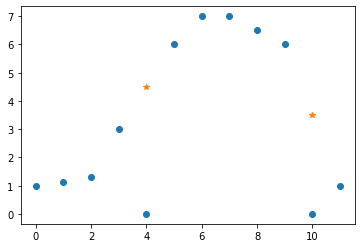

In [31]:
plt.plot(x, y, 'o')
plt.plot(x_new, y_new, '*')

In [41]:
[x_new, x_new]

[array([ 4, 10]), array([ 4, 10])]

In [43]:
f([])

array([], dtype=float64)

In [46]:
mask

array([[False,  True,  True, False, False],
       [False,  True, False, False,  True],
       [False, False, False,  True,  True]])

(array([0, 1, 2], dtype=int64),)

In [56]:
mask = np.array([[False,  False,  True, False, False],
       [False,  True, False, False,  True],
       [False, False, False,  True,  True],
       [False, False, False,  False,  False]])

In [59]:
np.nonzero(mask.sum(axis=1))[0]

array([0, 1, 2], dtype=int64)

In [63]:
y

array([1.  , 1.14, 1.3 , 3.  , 0.  , 6.  , 7.  , 7.  , 6.5 , 6.  , 0.  ,
       1.  ])

In [66]:
np.nonzero(y)

(array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 11], dtype=int64),)

In [70]:
np.argwhere(y == 0)

array([[ 4],
       [10]], dtype=int64)

In [73]:
mask[1,:]

array([False,  True, False, False,  True])

In [77]:
a = np.arange(20).reshape(2,2,5)

In [78]:
shape = a.shape
shape

(2, 2, 5)

In [79]:
a.reshape(-1, shape[-1])

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [80]:
a.reshape(-1, shape[-1]).reshape(shape)

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [82]:
a[:,:,1].max(axis=1)

array([ 6, 16])

In [87]:
import os

import fiona
import pickle
import shapely
import numpy as np
import pandas as pd
import geopandas as gpd
import skimage
import rasterio
from rasterio.windows import Window

In [95]:
def prepare_meta_window(geotiff_dir, label_path):
    img_path = geotiff_dir + os.listdir(geotiff_dir)[0]
    img = rasterio.open(img_path)
    transform, dst_crs = img.transform, img.crs

    label_shp = gpd.read_file(label_path)
    label_shp = label_shp.to_crs(dst_crs)
    window = get_window(transform, label_shp.total_bounds)

    _, meta = load_geotiff(img_path, window, as_float=False)
    return meta, window


def get_window(transform, bounds):
    """

    Parameters
    ----------
    transform
    bounds

    Returns
    -------
    Window(col_off, row_off, width, height)
    """
    minx, miny, maxx, maxy = bounds
    row_min, col_min = rasterio.transform.rowcol(transform, minx, maxy)
    row_max, col_max = rasterio.transform.rowcol(transform, maxx, miny)
    return Window(col_min, row_min, col_max - col_min, row_max - row_min)

def load_geotiff(path, window=None, as_float=True):
    """ Load the geotiff as a list of numpy array.
        INPUT : path (str) -> the path to the geotiff
                window (rasterio.windows.Window) -> the window to use when loading the image
        OUTPUT : band (list of numpy array) -> the different bands unscaled
                 meta (dictionary) -> the metadata associated with the geotiff
    """
    with rasterio.open(path) as f:
        if as_float:
            band = [skimage.img_as_float(f.read(i + 1, window=window)) for i in range(f.count)]
        else:  # normal read
            band = [f.read(i + 1, window=window) for i in range(f.count)]
        meta = f.meta
        if window is not None:
            meta['height'] = window.height
            meta['width'] = window.width
            meta['transform'] = f.window_transform(window)
    return band, meta


In [102]:
feature_dir = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43SFR/raster/'
label_path = '../data/train_labels/train_labels.shp'

In [96]:
meta, window = prepare_meta_window(feature_dir, label_path)

In [99]:
meta, window

({'driver': 'GTiff',
  'dtype': 'uint16',
  'nodata': None,
  'width': 1531,
  'height': 2241,
  'count': 5,
  'crs': CRS.from_epsg(32643),
  'transform': Affine(10.0, 0.0, 693170.0,
         0.0, -10.0, 3568220.0)},
 Window(col_off=9317, row_off=3178, width=1531, height=2241))

In [98]:
%%timeit
load_geotiff('N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/train_region/L2A_T43SFR_A014860_20200110T053549.tiff')

([array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 

In [106]:
%%timeit
load_geotiff(feature_dir + 'L2A_T43SFR_A027558_20201001T053726.tiff', window, as_float=False)

810 ms ± 101 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [107]:
%%timeit
load_geotiff(feature_dir + 'L2A_T43SFR_A027558_20201001T053726.tiff', window, as_float=True)

910 ms ± 123 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
np.arange(10).reshape(2,5)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [109]:
np.arange(10).reshape(2,5).mean(axis=0)

array([2.5, 3.5, 4.5, 5.5, 6.5])

In [1]:
import rasterio

In [2]:
raster = rasterio.open('N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43SFR/raster/L2A_T43SFR_A014860_20200110T053549.tiff')

In [3]:
raster.descriptions

('B02', 'B03', 'B04', 'B08', 'cloud mask')

In [4]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 10980,
 'height': 10980,
 'count': 5,
 'crs': CRS.from_epsg(32643),
 'transform': Affine(10.0, 0.0, 600000.0,
        0.0, -10.0, 3600000.0)}

In [8]:
raster.descriptions.index('cloud mask')

4

In [13]:
a = list(raster.descriptions)
a.remove('cloud mask')
a

['B02', 'B03', 'B04', 'B08']

In [16]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [19]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
b = list(range(10))
b.pop(2)
b

[0, 1, 3, 4, 5, 6, 7, 8, 9]

In [25]:
import numpy as np

In [27]:
np.array([0,1,2,3,4])[[0,1]]

array([0, 1])

In [1]:
isinstance([1,2], list)

True

In [2]:
isinstance('sss', str)

True

In [4]:
131639156/1024/1000

128.55386328125

## Quick check

In [5]:
quick_check = r'K:\2021-data-org\4. RESEARCH_n\ML\MLsatellite\Data\layers_india\GT\survey-farmer-locations\processed\shp\survey_points_20211213_quick_look.shp'

In [3]:
import geopandas as gpd

In [6]:
shp = gpd.read_file(quick_check)

In [8]:
shp.head()

,field_1,Name of th,Contact nu,Gender,Are you a,If Yes_ Pl,If Yes_ _1,Site GPS l,Site GPS_1,Altitude (,...,Can you wr,Please m_1,Do you use,"If Yes, do","If Yes, 10",What is _5,Operating,assessment,map,geometry
0,2021-05-20,xxzzxxvv,94jk669yz5,Male,No,None,None,31.1922965118397,77.7477854408256,5800,...,Yes,"English, Hindi",Yes,Yes,Yes,Samsung,Android,NaN,None,POINT Z (77.74779 31.19230 0.00000)
1,2021-06-21,xxzzxxvv,98167jk037,Male,No,Progressive Growers Association,240.0,31.1154025094707,77.8020973736234,7300,...,Yes,"English, Hindi",Yes,Yes,Yes,Xiaomi,Android,NaN,None,POINT Z (77.80210 31.11540 0.00000)
2,2021-05-22,xxzzxxvv,xyab040007,Male,Yes,Baghi Apple Growers Society,None,31.1409520521778,77.7861961282442,6200,...,Yes,"English, Hindi",Yes,Yes,Yes,Vivo,Android,NaN,None,POINT Z (77.78620 31.14095 0.00000)
3,2021-05-25,xxzzxxvv,94jk8qr6st2,Male,Yes,Jubbal Apple Growers Society,300.0,31.1061073409128,77.6496921409057,7500,...,Yes,"English, Hindi",Yes,Yes,Yes,Apple,IoS,NaN,None,POINT Z (77.64969 31.10611 0.00000)
4,2021-06-26,xxzzxxvv,stjk325953,Male,Yes,None,None,None,None,6000,...,Yes,English and Hindi,Yes,Yes,Yes,Xiaomi,Android,NaN,None,None


In [12]:
shp.groupby(by='assessment').count()['geometry']

assessment
-1.0     27
 0.0      9
 1.0    156
 2.0    124
Name: geometry, dtype: int64

In [32]:
shp[~shp['Site GPS l'].isnull().values].assessment.isnull().values.sum()

61

In [16]:
shp.shape

(484, 113)

In [33]:
shp.assessment.isnull().values.sum()

168

In [34]:
168-61

107

## Check file number

In [1]:
path = r'N:\dataorg-datasets\MLsatellite\sentinel2_images\images_danya'

In [2]:
import os

In [9]:
print(f'tile\t# raw\t# L1C\t# L2A\t# raster')
for i in os.listdir(path):
    if i.startswith('43') or i.startswith('44'):
        l = []
        for j in ['raw', 'L1C', 'L2A', 'raster']:
            if os.path.exists(os.path.join(path, i, j)):
                l.append(len(os.listdir(os.path.join(path, i, j))))
            else:
                l.append(0)
        print(f'{i}\t{l[0]}\t{l[1]}\t{l[2]}\t{l[3]}')

tile	# raw	# L1C	# L2A	# raster
43RFQ	141	141	141	141
43RGP	64	0	0	0
43RGQ	65	65	65	65
43SER	71	71	71	71
43SES	70	70	70	70
43SFR	131	131	131	132
43SFS	139	139	139	139
43SGR	68	68	68	68
43SGS	136	136	136	136
44RKV	142	142	142	142
44SKA	140	140	140	140


In [8]:
print(f'tile\t# raw\t# L1C\t# L2A\t# raster')
for i in os.listdir(path):
    if i.startswith('43') or i.startswith('44'):
        l = []
        for j in ['raw', 'L1C', 'L2A', 'raster']:
            if os.path.exists(os.path.join(path, i, j)):
                l.append(len(os.listdir(os.path.join(path, i, j))))
            else:
                l.append(0)
        print(f'{i}\t{l[0]}\t{l[1]}\t{l[2]}\t{l[3]}')

tile	# raw	# L1C	# L2A	# raster
43RFQ	141	141	141	141
43RGP	53	0	0	0
43RGQ	65	65	65	65
43SER	71	71	71	71
43SES	70	70	70	70
43SFR	131	131	131	132
43SFS	139	139	140	138
43SGR	68	68	68	68
43SGS	136	136	136	136
44RKV	142	142	142	142
44SKA	140	140	140	140


In [17]:
727365852/2241/1531/5

42.4

In [18]:
365/70

5.214285714285714

## Check raster

In [10]:
import rasterio

In [12]:
f = rasterio.open(os.path.join(path, '43SER', 'raster', 'L2A_T43SER_A017620_20200721T054903.tiff'))

In [14]:
f.crs

In [15]:
arr5 = f.read(5)

In [16]:
arr5.max(), arr5.min()

(0, 0)

## Cat mask

In [20]:
import numpy as np

In [36]:
a = np.arange(10).reshape(2,5)
b = np.array([0,2,2,4,5,4,7,7,8,0]).reshape(2,5)


In [37]:
np.stack([a,b])

array([[[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]],

       [[0, 2, 2, 4, 5],
        [4, 7, 7, 8, 0]]])

In [30]:
np.stack([a,b]).shape

(2, 2, 5)

In [38]:
np.stack([a,b]).max(axis=0)

array([[0, 2, 2, 4, 5],
       [5, 7, 7, 8, 9]])

In [60]:
np.indices(np.stack([a,b]).argmax(axis=0).shape)

array([[[0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1]],

       [[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]])

In [61]:
np.indices(np.stack([a,b]).argmax(axis=0).shape)[0]

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1]])

In [62]:
np.indices(np.stack([a,b]).argmax(axis=0).shape)[1]

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [58]:
np.stack([a,b]).argmax(axis=0)

array([[0, 1, 0, 1, 1],
       [0, 1, 0, 0, 0]], dtype=int64)

In [63]:
np.stack([a,b])[np.stack([a,b]).argmax(axis=0), 
                np.indices(np.stack([a,b]).argmax(axis=0).shape)[0], 
                np.indices(np.stack([a,b]).argmax(axis=0).shape)[1]]

array([[0, 2, 2, 4, 5],
       [5, 7, 7, 8, 9]])

In [64]:
np.stack([a,b,a])

array([[[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]],

       [[0, 2, 2, 4, 5],
        [4, 7, 7, 8, 0]],

       [[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]])

In [65]:
np.stack([a,b,a])[np.stack([a,b,a]).argmax(axis=0), 
                    np.indices(np.stack([a,b,a]).argmax(axis=0).shape)[0], 
                    np.indices(np.stack([a,b,a]).argmax(axis=0).shape)[1]]

array([[0, 2, 2, 4, 5],
       [5, 7, 7, 8, 9]])

In [78]:
np.stack([list(a), list(b)], axis=2)

array([[[0, 0],
        [1, 2],
        [2, 2],
        [3, 4],
        [4, 5]],

       [[5, 4],
        [6, 7],
        [7, 7],
        [8, 8],
        [9, 0]]])

In [79]:
np.stack([list(a)])

array([[[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]])

In [80]:
np.stack(a)

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [81]:
13723884/5

2744776.8

In [87]:
a = np.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4]).reshape(3,-1)
a

array([[0, 3, 0, 1, 0],
       [1, 2, 1, 0, 0],
       [0, 0, 1, 3, 4]])

In [90]:
unique, counts = np.unique(a, return_counts=True, axis=1)
unique, counts

(array([[0, 0, 0, 1, 3],
        [0, 1, 1, 0, 2],
        [4, 0, 1, 3, 0]]),
 array([1, 1, 1, 1, 1], dtype=int64))

In [ ]:
dict(zip(unique, counts))

In [91]:
(a == 0).sum(axis=1)

array([3, 2, 2])

## VRT file

In [1]:
path = r'K:\2021-data-org\4. RESEARCH_n\ML\MLsatellite\Data\layers_india\ancilliary_data\elevation\IND_alt.vrt'

In [2]:
import rasterio 
import rasterio.plot

from osgeo import gdal

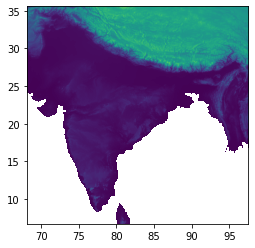

In [3]:
# vrt_options = gdal.BuildVRTOptions(resampleAlg='cubic', addAlpha=True)
# test_vrt = gdal.BuildVRT(r'D:\Test TIFF\test.vrt', [r'D:\Test TIFF\Tile_58_LULC250k_2015_16_revised.tif', r'D:\Test TIFF\Tile_60_LULC250k_2015_16_revised.tif'], options=vrt_options)

# test_vrt = None

with rasterio.open(path) as vrt:
    rasterio.plot.show(vrt)

In [5]:
vrt = rasterio.open(path)

In [8]:
arr = vrt.read(1)

In [10]:
arr

array([[ 3234,  3287,  3395, ...,  4453,  4332,  4351],
       [ 3338,  3539,  3407, ...,  4334,  4313,  4270],
       [ 3441,  3423,  3253, ...,  4182,  4171,  4159],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [9]:
arr.shape

(3468, 3528)

In [11]:
vrt.crs

CRS.from_epsg(4326)

In [13]:
vrt.colorinterp

(<ColorInterp.undefined: 0>,)

In [14]:
from matplotlib import pyplot
from matplotlib import colors, cm

cmap = pyplot.get_cmap('rainbow')

In [16]:
cmap.colors

AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

In [19]:
cm.get_cmap('Set1').colors

((0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098),
 (1.0, 0.4980392156862745, 0.0),
 (1.0, 1.0, 0.2),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373),
 (0.6, 0.6, 0.6))

In [20]:
2168-434

1734

In [21]:
rasterio.open(path).bounds

BoundingBox(left=68.1, bottom=6.700001156000003, right=97.49999882399999, top=35.6)

In [27]:
import geopandas as gpd
import shapely

In [23]:
region_shp_path = r'K:\2021-data-org\4. RESEARCH_n\ML\MLsatellite\Research\WP1_Danya\ML4Satellite\data\train_area\train_area.shp'

In [24]:
shp = gpd.read_file(region_shp_path)

In [25]:
shp.bounds

,minx,miny,maxx,maxy
0,77.03218,32.023317,77.217681,32.254446


In [29]:
minx, miny, maxx, maxy = shp.total_bounds

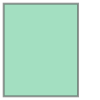

In [30]:
shapely.geometry.box(minx, miny, maxx, maxy)

In [31]:
from rasterio.windows import Window

In [40]:
windows = Window(0,0,10,10) 

In [34]:
meta = rasterio.open(path).meta

In [35]:
meta

{'driver': 'VRT',
 'dtype': 'int16',
 'nodata': -9999.0,
 'width': 3528,
 'height': 3468,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.008333333, 0.0, 68.1,
        0.0, -0.008333333, 35.6)}

In [39]:
rasterio.transform.xy(meta['transform'], 0, 0)

(68.10416666649999, 35.5958333335)

In [42]:
windows.height

10

In [48]:
windows

Window(col_off=0, row_off=0, width=10, height=10)

In [52]:
rasterio.windows.bounds(windows, meta['transform'])

(68.1, 35.51666667, 68.18333333, 35.6)

In [53]:
box_shp = gpd.GeoDataFrame({'geometry': shapely.geometry.box(minx, miny, maxx, maxy)}, index=[0])
box_shp = box_shp.set_crs(meta['crs'])

In [57]:
box_shp.loc[0,'geometry']

TypeError: 'Polygon' object is not subscriptable

In [59]:
(arr == 0).sum()

8510

### CRS in raw

In [2]:
import rasterio

In [3]:
eg_dir = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43RGQ/raster/L2A_T43RGQ_A019865_20201225T053231.tiff'
eg_img = rasterio.open(eg_dir)

In [4]:
eg_img.crs

In [6]:
eg_dir = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43SFR/raster/L2A_T43SFR_A014760_20200103T054832.tiff'
eg_img = rasterio.open(eg_dir)

In [7]:
eg_img.crs

CRS.from_epsg(32643)

In [8]:
eg_dir = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43SFS/raster/L2A_T43SFS_A014760_20200103T054832.tiff'
eg_img = rasterio.open(eg_dir)

In [9]:
eg_img.crs

In [ ]:
arr5 = eg_img.read(5)

In [ ]:
np.unique(arr5)

In [1]:
import xml.etree.ElementTree as ET

In [7]:
path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43RGQ/L2A/S2A_MSIL2A_20200115T053151_N9999_R105_T43RGQ_20220103T133510.SAFE/GRANULE/L2A_T43RGQ_A023840_20200115T053150/MTD_TL.xml'
tree = ET.parse(path)

In [8]:
tree

In [9]:
root = tree.getroot()

In [10]:
root

<Element '{https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-2A_Tile_Metadata.xsd}Level-2A_Tile_ID' at 0x000002730B65C590>

In [12]:
for i in root:
    print(i)

<Element '{https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-2A_Tile_Metadata.xsd}General_Info' at 0x000002730B65C720>
<Element '{https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-2A_Tile_Metadata.xsd}Geometric_Info' at 0x000002730B65CA90>
<Element '{https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-2A_Tile_Metadata.xsd}Quality_Indicators_Info' at 0x000002730B82AA40>


In [13]:
root[1]

<Element '{https://psd-14.sentinel2.eo.esa.int/PSD/S2_PDI_Level-2A_Tile_Metadata.xsd}Geometric_Info' at 0x000002730B65CA90>

In [19]:
root[1][0][1].text

'EPSG:32643'

In [20]:
from pyproj import CRS

In [21]:
CRS.from_string(root[1][0][1].text)

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### Test crs

In [23]:
import rasterio

In [24]:
path = 'N:/dataorg-datasets/MLsatellite/sentinel2_images/images_danya/43RGQ/raster/L2A_T43RGQ_A023840_20200115T053150.tiff'
img = rasterio.open(path)

In [25]:
img.crs

CRS.from_epsg(32643)